In [44]:
import re
import pandas as pd
from sortedcontainers import SortedSet
import nltk
from nltk.tokenize import word_tokenize

# # Download the NLTK data (only the first time)
# nltk.download('punkt')

In [45]:
''' 2) Write a notebook that loads the sample file, and performs tokenization '''

# Load the CSV file
file_path = 'spam_ham_dataset.csv'  # Change this to your file's name
df = pd.read_csv(file_path, encoding='utf-8')

# Display basic info about the dataset
print(df.info())

# Display the distribution of categories
print(df['label'].value_counts())

def tokenize(text: str) -> list():
    pattern = r'\w+'
    tokens = re.findall(pattern, text)
    return tokens

# Tokenize the text column
df['tokens'] = df['text'].apply(tokenize)

print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None
label
ham     3672
spam    1499
Name: count, dtype: int64
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

                                              tokens  
0  [Subject, enron, methanol, meter, 988291, this...  
1  [Subject, hpl, nom, f

Unnamed: 0     int64
label         object
text          object
tokens        object
dtype: object
(5171, 4)
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

                                              tokens  
0  [Subject, enron, methanol, meter, 988291, this...  
1  [Subject, hpl, nom, for, january, 9, 2001, see...  
2  [Subject, neon, retreat, ho, ho, ho, we, re, a...  
3  [Subject, photoshop, windows, office, cheap, m...  
4  [Subject, re, indian, springs, this, deal, is,...  
Category: ham
[('the', 18359), ('to', 15172), ('ect', 13897), ('for', 7982), ('and', 7912), ('hou', 7281), ('enron', 

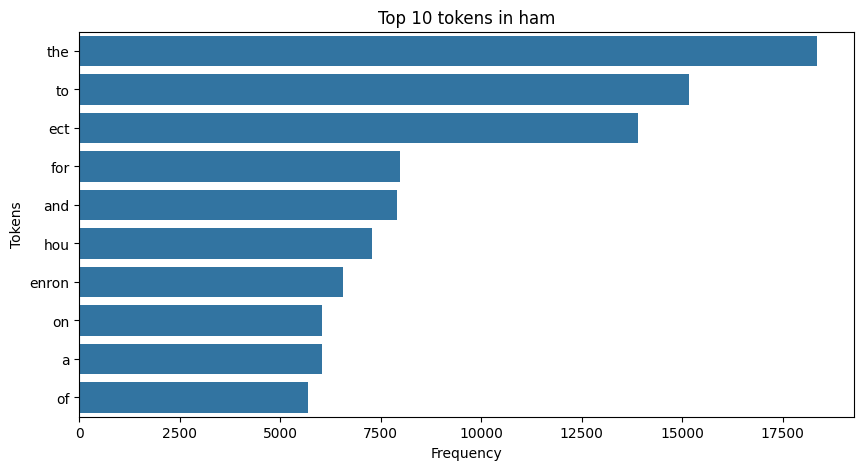

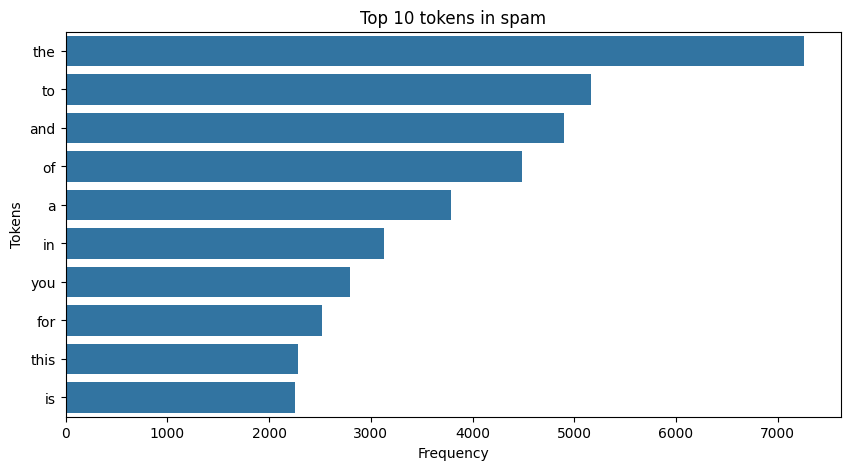

In [46]:
''' 3)  Carry out an EDA in the notebook that samples the information and shows several different analyzes of the data.
You must also show the frequency of tokens for each category and present it in a table or diagram '''
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print(df.dtypes)
print(df.shape)
print(df.head())

# Function to count tokens
def count_tokens(tokens):
    return Counter(tokens)

# Count tokens in each row
df['token_counts'] = df['tokens'].apply(count_tokens)

# Aggregate token counts by category
token_counts_by_category = df.groupby('label')['token_counts'].sum()

# Display token frequency for each category
for category, counter in token_counts_by_category.items():
    print(f"Category: {category}")
    print(counter.most_common(50))

# Function to plot tokens
def plot_top_tokens(counter, category, num_tokens=10):
    top_tokens = counter.most_common(num_tokens)
    tokens = [token[0] for token in top_tokens]
    counts = [token[1] for token in top_tokens]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts, y=tokens)
    plt.title(f"Top {num_tokens} tokens in {category}")
    plt.xlabel('Frequency')
    plt.ylabel('Tokens')
    plt.show()

# Plot top tokens for each category
for category, counter in token_counts_by_category.items():
    plot_top_tokens(counter, category)

In [47]:
'''4) Carry out feature retrieval in a notebook using a method we learned'''
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Aggregate all tokens
all_tokens = df['tokens'].sum()

# Create a set of unique words for each category
wordset = SortedSet()
wordset.update(all_tokens)

def calculate_bow(wordset, l_doc):
    tf_diz = dict.fromkeys(wordset, 0)  # creates a dictionary
    for word in l_doc:  # iterates through each word
        tf_diz[word] = l_doc.count(word)  # For each word, this line counts its occurrences in l_doc and updates the corresponding entry in tf_diz
    return tf_diz

# Apply the calculate_bow function to each document
df['bow'] = df['tokens'].apply(lambda doc: calculate_bow(wordset, doc))

# Display the DataFrame with the new 'bow' column
print(df[['text', 'bow']])

vectorizer_tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X = vectorizer_tfidf.fit_transform(df['text'])
# Get feature names (words)
feature_names = vectorizer_tfidf.get_feature_names_out()

df_tfidf_sklearn = pd.DataFrame(X.toarray(), columns=feature_names)
df_tfidf_sklearn



                                                   text  \
0     Subject: enron methanol ; meter # : 988291\r\n...   
1     Subject: hpl nom for january 9 , 2001\r\n( see...   
2     Subject: neon retreat\r\nho ho ho , we ' re ar...   
3     Subject: photoshop , windows , office . cheap ...   
4     Subject: re : indian springs\r\nthis deal is t...   
...                                                 ...   
5166  Subject: put the 10 on the ft\r\nthe transport...   
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168  Subject: calpine daily gas nomination\r\n>\r\n...   
5169  Subject: industrial worksheets for august 2000...   
5170  Subject: important online banking alert\r\ndea...   

                                                    bow  
0     {'0': 0, '00': 1, '000': 0, '0000': 0, '000000...  
1     {'0': 0, '00': 0, '000': 0, '0000': 0, '000000...  
2     {'0': 0, '00': 0, '000': 0, '0000': 0, '000000...  
3     {'0': 0, '00': 0, '000': 0, '0000': 0, '000000...  
4

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,0.10427,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.00000,0.123451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
''' 5) Building a Model and Making Predictions 
    6) In the notebook, perform an accuracy assessment for the model by retrieving indicators such as accuracy, precision 1f, recall from his run on a labeled test set.
'''
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size=0.3, random_state=42)

# Initialize the classifier
clf = MultinomialNB()

# Train
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam') 
recall = recall_score(y_test, y_pred, pos_label='spam') 
f1 = f1_score(y_test, y_pred, pos_label='spam')  

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

ValueError: Found input variables with inconsistent numbers of samples: [5, 5171]

In [ ]:
''' 7) Return to section 4 and perform at least 3 more runs with a different retrieval of features and/or
Choosing another algorithm '''






In [ ]:
''' 8) Arrange in the Pandas table a view of each of the runs you did and compare the results '''

In [ ]:
''' 9) Refer to the run that gave the highest "accuracy" and try to formulate reasons why this is the run the most "accurate". Write a thesis that looks logical and is reasoned.'''